# Self-organized critical neural network
Neural systems process information in a dynamical regime between silence and chaotic dynamics.
This has lead to the *criticality hypothesis* which suggests that neural systems reach such a state by self-organizing towards the critical point of a dynamical phase transition.
Here, a minimal neural network model is studied: it exhibits self-organized criticality in the
presence of stochastic noise using a rewiring rule which only utilizes local information. For network evolution, incoming links are added to a node or deleted, depending on the node average activity.
Based on this rewiring-rule only, the network autonomously evolves towards a critcal state, which is independent on initial conditions and robust under stochastic noise.

Let's describe the model in more detail: consider a directed graph with **n** nodes with binary states $\sigma_i(t) \in \{0,1\}$, representing resting and firing neurons. Signals are
transmitted between nodes $i$ and $j$ via activating or inhibiting links $C_{ij} \in \{-1,1\}$. If there is no connection between $i$ and $j$ then $C_{ij} = 0$.
Besides the fast dynamical variables $\sigma_i(t)$ of the network, the connections $C_{ij}(t)$ form a second set of dynamical variables of the system which are evolving on a **T** times slower time scale than the neurons states.

Other parameters of the model are $\alpha \in [0,1]$, which determines the temporal memory of the neurons and $\beta \in [0,\infty[$, which simply represents the inverse temperature, serving the purpose of quantifying the amount of noise in the network.
Setting this framework and defining properly the $\sigma_i(t)$ evolution (fast neurons dynamics) and $C_{ij}(t)$ evolution (much slower network topology modification), the model behaves as a fully autonomous system with adaptation dynamics.

In [1]:
#import SOC Network class and print infos about the model parameters

from socmodel.source.network import Network
print(Network.__doc__)


  Parameters
  ----------
    n : int
      Size of the model (number of neurons).
      It must be greater or equal than 1

    alpha : float
      Temporal memory of the model.
      It must be between 0 (no memory) and 1 (full memory)

    beta : float
      Inverse temperature of the model.
      It must be greater or equal than 0

    T : int
      Number of steps for the evolution time scale: it represents the time scale
      separation between fast neurons dynamics (state evolution) and slow change
      in the network topology (connectivity evolution).
      It must be greater of equal than 1

    sigma_init : BaseState, default=ZerosState()
      State vector initializer

    C_init : BaseConnectivity, default=ZerosConnectivity()
      Connectivity matrix initializer
  


In [2]:
#create a SOC Network object specifying the model parameters
socmodel = Network(n=1000, alpha=0.2, beta=10., T=10)

#run the simulation to evolve the system towards the critical state
Kplus, Kminus, branchPar = socmodel.run(evolution_steps=10000)

Simulation: 100%|████████████████████████████████████████████| 10000/10000 [00:18<00:00, 535.16it/s]


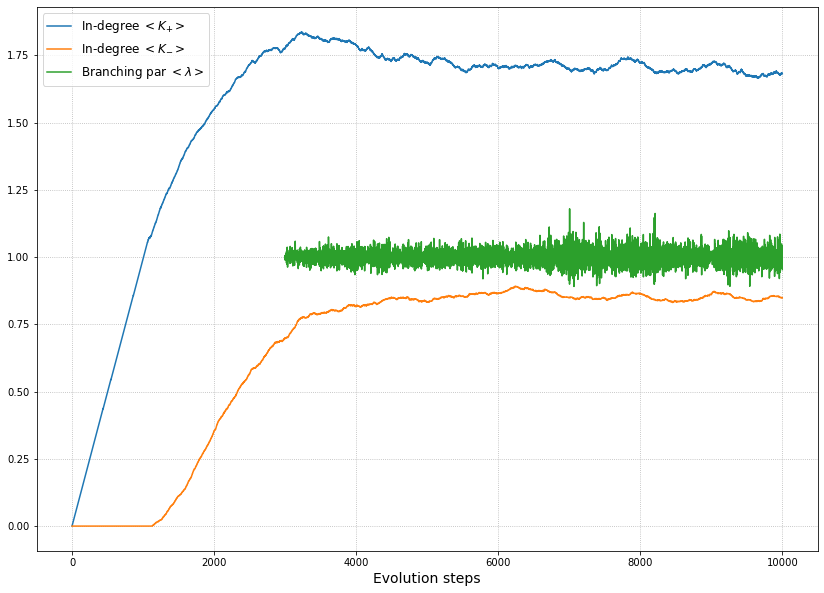

In [3]:
#plot the nodes average in-degree and the network branching parameter

from socmodel.plotting import show_simulation
show_simulation(Kplus=Kplus, Kminus=Kminus, branchPar=branchPar)